In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [7]:
df = pd.read_csv('titanic_toy.csv')
df.sample(5)

,Age,Fare,Family,Survived
408,21.0,7.775,0,0
55,NaN,35.500,0,1
215,31.0,113.275,1,1
816,23.0,NaN,0,0
417,18.0,13.000,2,1


In [9]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [13]:
X = df.drop(columns=['Survived'])
y = df.Survived

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

X_train.shape,X_test.shape

((712, 3), (179, 3))

In [23]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [31]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [37]:
X_train.sample(10)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
288,42.0,13.0000,0,42.000000,42.0,13.0000,13.0000
424,18.0,20.2125,2,18.000000,18.0,20.2125,20.2125
632,32.0,30.5000,0,32.000000,32.0,30.5000,30.5000
170,61.0,33.5000,0,61.000000,61.0,33.5000,33.5000
55,NaN,35.5000,0,29.498846,28.0,35.5000,35.5000
565,24.0,24.1500,2,24.000000,24.0,24.1500,24.1500
528,39.0,7.9250,0,39.000000,39.0,7.9250,7.9250
726,30.0,21.0000,3,30.000000,30.0,21.0000,21.0000
713,29.0,9.4833,0,29.000000,29.0,9.4833,9.4833
351,NaN,35.0000,0,29.498846,28.0,35.0000,35.0000


# Check Distribution

In [71]:
def CheckPlot(col):
    plt.figure(figsize=(14,4))
    ax1 = plt.subplot(121)
    X_train[f"{col}_mean"].hist(color='red',ax=ax1)
    X_train[f"{col}_median"].hist(color='green',ax=ax1)
    X_train[col].hist(color='blue',ax = ax1)

    ax2 = plt.subplot(122)
    X_train[f"{col}_mean"].plot(kind='kde',color='red',ax=ax2)
    X_train[f"{col}_median"].plot(kind='kde',color='green',ax=ax2)
    X_train[col].plot(kind='kde',color='blue',ax = ax2)
    

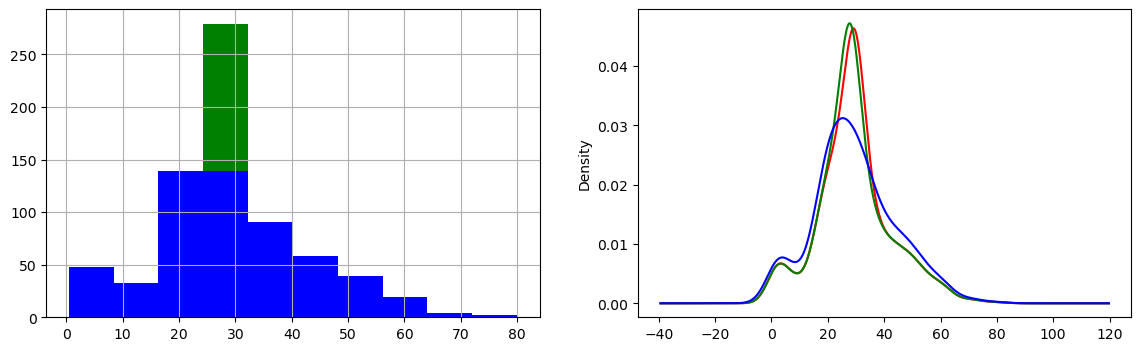

In [73]:
CheckPlot('Age')

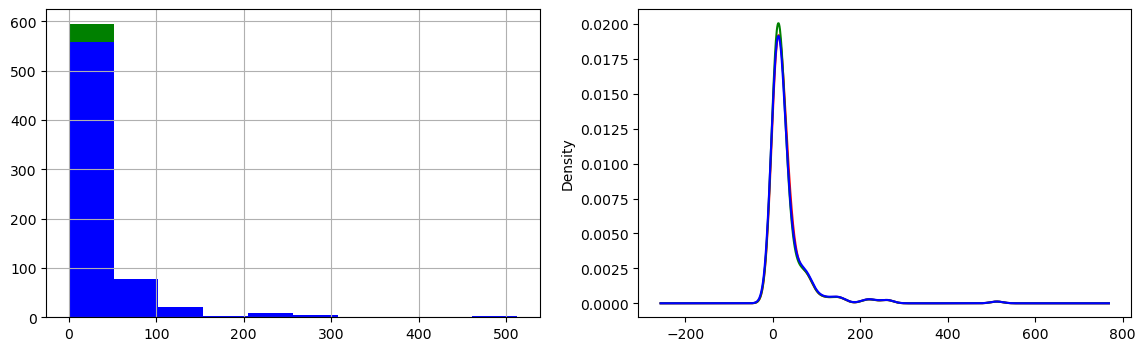

In [75]:
CheckPlot('Fare')

# Check Variation Deviation

In [80]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())

Original Age variable variance:  210.2517072477438
Age Variance after mean imputation:  168.8519336687225
Age Variance after median imputation:  169.20731007048096
Original Fare variable variance:  2761.031434948639
Fare Variance after mean imputation:  2621.2323749512393
Fare Variance after median imputation:  2637.01248167777


# Check Co-variance and Correlation 

In [83]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [85]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


# check Outliers

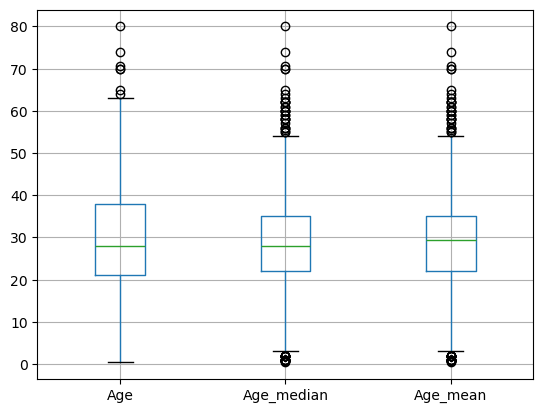

In [90]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()
plt.show()

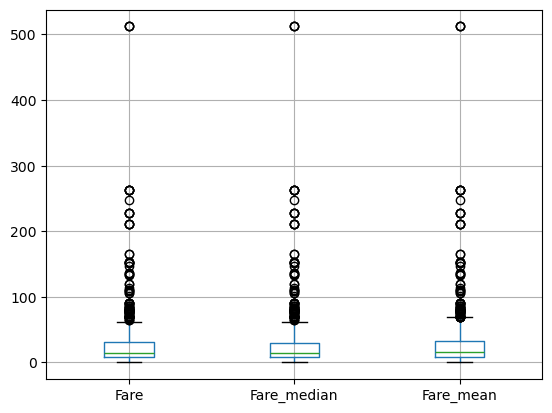

In [94]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()
plt.show()

# using Sklearn

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [103]:
trf = ColumnTransformer([
    ('imp1',SimpleImputer(strategy='median'),['Age']),
    ('imp2',SimpleImputer(strategy='mean'),['Fare'])
],remainder='passthrough')

In [119]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imp2', SimpleImputer(), ['Fare'])])

In [131]:
trf.named_transformers_.imp2.statistics_

array([32.51778772])

In [133]:
X_train_trf = trf.transform(X_train)
X_test_trf = trf.transform(X_test)

In [137]:
X_train_trf = pd.DataFrame(X_train_trf,columns=X_train.columns)

In [145]:
X_train_trf.isnull().mean()

Age       0.0
Fare      0.0
Family    0.0
dtype: float64